# Crop ECG Images

In [53]:
# import required libraries
import pandas as pd
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import glob
import xlsxwriter
import math
import openpyxl

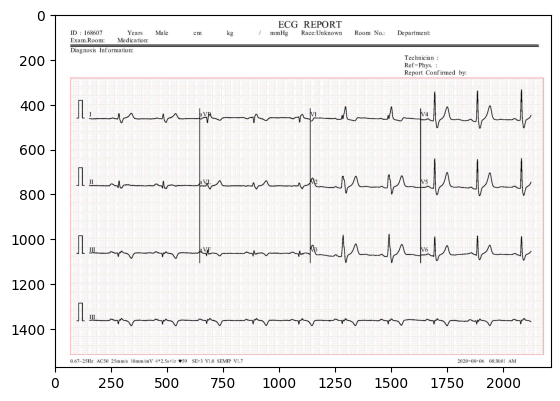

In [51]:
# load and read image
image = io.imread(r"C:\Users\Arfan Shah\Downloads\gwbz3fsgp8-2\Normal Person ECG Images (284x12=3408)\Normal(6).jpg")
plt.imshow(image)

In [25]:
# find shape of the above image
image.shape

(1572, 2213, 3)

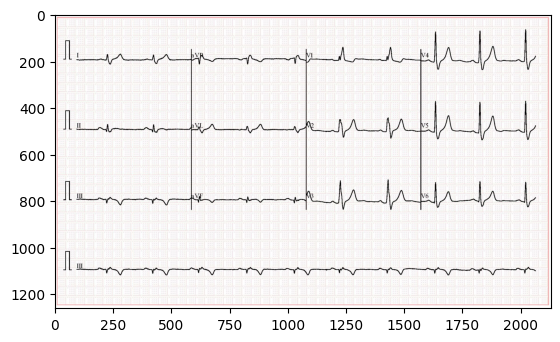

In [26]:
# crop image

# initial posotion
(x, y) = (270, 60)

# width and height
width, height = 1260, 2130

cropped_image = image[x : x + width, y : y + height]

plt.imshow(cropped_image)

In [27]:
# shape of cropped image
cropped_image.shape

(1260, 2130, 3)

### Crop Normal Images

In [30]:
# crop all the normal images and store them in an array
normal = []

for i in glob.glob(r"C:\Users\Arfan Shah\Downloads\gwbz3fsgp8-2\Normal Person ECG Images (284x12=3408)\*.*"):

    # read image
    image = io.imread(i)

    # crop image
    # initial posotion
    (x, y) = (270, 60)

    # width and height
    width, height = 1260, 2130

    cropped_image = image[x : x + width, y : y + height]
    normal.append(cropped_image)

In [31]:
len(normal)

284

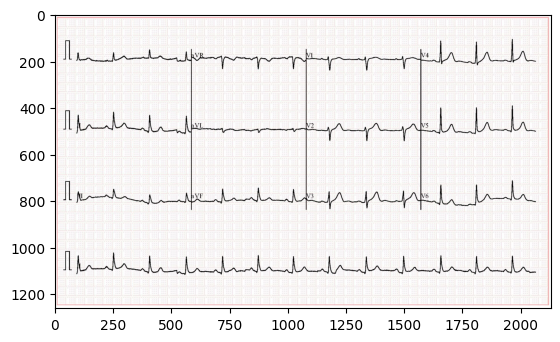

In [38]:
plt.imshow(normal[283])

### Crop Abnormal Images

In [39]:
# crop abnormal images

# delcare a list
abnormal = []

# loop and read all the abnormal images
for x in glob.glob(r"C:\Users\Arfan Shah\Downloads\gwbz3fsgp8-2\ECG Images of Patient that have abnormal heartbeat (233x12=2796)\*.*"):

    # read image
    ab_image = io.imread(x)

    # crop image
     # initial posotion
    (x, y) = (270, 60)

    # width and height
    width, height = 1260, 2130

    crop_image = ab_image[x : x + width, y : y + height]

    abnormal.append(crop_image)    

In [41]:
# length of image
len(abnormal)

233

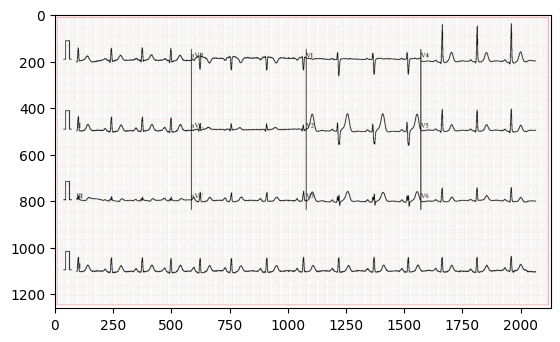

In [43]:
# show random image
plt.imshow(abnormal[232])

In [46]:
abnormal

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 254, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

# Features Extraction

### Extract Features for Normal

In [48]:
# create a workbook and worksheet
workbook = xlsxwriter.Workbook('crop_normal.xlsx')
worksheet = workbook.add_worksheet()

# write headers
worksheet.write('A1', 'Red_Mean')
worksheet.write('B1', 'Red_Median')
worksheet.write('C1', 'Red_Var')
worksheet.write('D1', 'Red_Std')
worksheet.write('E1', 'Green_Mean')
worksheet.write('F1', 'Green_Median')
worksheet.write('G1', 'Green_Var')
worksheet.write('H1', 'Green_Std')
worksheet.write('I1', 'Blue_Mean')
worksheet.write('J1', 'Blue_Median')
worksheet.write('K1', 'Blue_Var')
worksheet.write('L1', 'Blue_Std')

workbook.close()

In [54]:
# now iterate through the list and extract features from each image array
for normal_image in normal:

    # read separate image
    normal_image = normal_image

    # split array into three channels
    red = normal_image[ : , : , 0]
    green = normal_image[ : , : , 1]
    blue = normal_image[ :, : , 2]

    # extract features for red channel
    Red_Mean = np.mean(red)
    Red_Median = np.median(red)
    Red_Var = np.var(red)
    Red_Std = math.sqrt(Red_Var)

    # extract features from green channel
    Green_Mean = np.mean(green)
    Green_Median = np.median(green)
    Green_Var = np.var(green)
    Green_Std = math.sqrt(Green_Var)

    # extract features for blue channel
    Blue_Mean = np.mean(blue)
    Blue_Median = np.median(blue)
    Blue_Var = np.var(blue)
    Blue_Std = math.sqrt(Blue_Var)

    # now make a list for all these extracted features
    list = [Red_Mean, Red_Median, Red_Var, Red_Std, Green_Mean, Green_Median, Green_Var, Green_Std, Blue_Mean, Blue_Median, Blue_Var, Blue_Std]

    # # now make an array
    # list_array = np.asarray(list)
    # load newly created excel file
    outworkbook = openpyxl.load_workbook('crop_normal.xlsx')

    # activate newly created worksheet
    outworksheet = outworkbook.active

    # append data into newly created excel sheet
    outworksheet.append(list)

    # save excel file
    outworkbook.save(filename = 'crop_normal.xlsx')

In [60]:
# load and read normal dataset
dataset1 = pd.read_excel('crop_normal.xlsx')
dataset1.head()

,Red_Mean,Red_Median,Red_Var,Red_Std,Green_Mean,Green_Median,Green_Var,Green_Std,Blue_Mean,Blue_Median,Blue_Var,Blue_Std
0,242.335507,255,1956.157674,44.228471,239.327321,252,2060.677429,45.394685,238.948731,251,2045.464796,45.226815
1,242.930073,255,1817.325945,42.630106,239.916662,252,1925.414014,43.879540,239.519515,251,1911.239068,43.717720
2,243.162086,255,1767.269902,42.038909,240.138954,252,1876.504274,43.318637,239.754340,251,1861.579167,43.146021
3,243.367604,255,1719.007133,41.460911,240.342837,252,1829.445854,42.772022,239.954953,251,1815.080850,42.603766
4,243.455668,255,1700.080203,41.232029,240.430601,252,1810.646392,42.551691,240.036611,251,1796.448856,42.384536


In [61]:
# add a column named as lanela and make it 0
dataset1['Label'] = 0
dataset1.head()

,Red_Mean,Red_Median,Red_Var,Red_Std,Green_Mean,Green_Median,Green_Var,Green_Std,Blue_Mean,Blue_Median,Blue_Var,Blue_Std,Label
0,242.335507,255,1956.157674,44.228471,239.327321,252,2060.677429,45.394685,238.948731,251,2045.464796,45.226815,0
1,242.930073,255,1817.325945,42.630106,239.916662,252,1925.414014,43.879540,239.519515,251,1911.239068,43.717720,0
2,243.162086,255,1767.269902,42.038909,240.138954,252,1876.504274,43.318637,239.754340,251,1861.579167,43.146021,0
3,243.367604,255,1719.007133,41.460911,240.342837,252,1829.445854,42.772022,239.954953,251,1815.080850,42.603766,0
4,243.455668,255,1700.080203,41.232029,240.430601,252,1810.646392,42.551691,240.036611,251,1796.448856,42.384536,0


### Extract Features for Abnormal ECGs

In [55]:
# create an excel file for features of MI
workbook1 = xlsxwriter.Workbook('crop_abnormal.xlsx')
worksheet1 = workbook1.add_worksheet()

# write headers into sheet
worksheet1.write('A1', 'Red_Mean')
worksheet1.write('B1', 'Red_Median')
worksheet1.write('C1', 'Red_Var')
worksheet1.write('D1', 'Red_Std')
worksheet1.write('E1', 'Green_Mean')
worksheet1.write('F1', 'Green_Median')
worksheet1.write('G1', 'Green_Var')
worksheet1.write('H1', 'Green_Std')
worksheet1.write('I1', 'Blue_Mean')
worksheet1.write('J1', 'Blue_Median')
worksheet1.write('K1', 'Blue_Var')
worksheet1.write('L1', 'Blue_Std')
workbook1.close()

In [56]:
# loop through all images in MI and extract features
for mi_image in abnormal:

    # split image into three channels
    red = mi_image[ : , : , 0]
    green = mi_image[ : , : , 1]
    blue = mi_image[ : , : , 2]

    # extract features for red channel
    Red_Mean = np.mean(red)
    Red_Median = np.median(red)
    Red_Var = np.var(red)
    Red_Std = math.sqrt(Red_Var)

    # extract features for green channel
    Green_Mean = np.mean(green)
    Green_Median = np.median(green)
    Green_Var = np.var(green)
    Green_Std = math.sqrt(Green_Var)

    # Extract features from blue channel
    Blue_Mean = np.mean(blue)
    Blue_Median = np.median(blue)
    Blue_Var = np.var(blue)
    Blue_Std = math.sqrt(Blue_Var)

    # make a list and store all the extracted features
    list = [Red_Mean, Red_Median, Red_Var, Red_Std, Green_Mean, Green_Median, Green_Var, Green_Std, Blue_Mean, Blue_Median, Blue_Var, Blue_Std]

    # now load newly created excel file
    outworkbook1 = openpyxl.load_workbook('crop_abnormal.xlsx')

    # activate excel sheet
    outworksheet1 = outworkbook1.active

    # now append values into worksheet
    outworksheet1.append(list)

    # save workbook
    outworkbook1.save(filename = 'crop_abnormal.xlsx')

In [57]:
# load and read abnormal features
dataset2 = pd.read_excel('crop_normal.xlsx')
dataset2.head()

,Red_Mean,Red_Median,Red_Var,Red_Std,Green_Mean,Green_Median,Green_Var,Green_Std,Blue_Mean,Blue_Median,Blue_Var,Blue_Std
0,242.335507,255,1956.157674,44.228471,239.327321,252,2060.677429,45.394685,238.948731,251,2045.464796,45.226815
1,242.930073,255,1817.325945,42.630106,239.916662,252,1925.414014,43.879540,239.519515,251,1911.239068,43.717720
2,243.162086,255,1767.269902,42.038909,240.138954,252,1876.504274,43.318637,239.754340,251,1861.579167,43.146021
3,243.367604,255,1719.007133,41.460911,240.342837,252,1829.445854,42.772022,239.954953,251,1815.080850,42.603766
4,243.455668,255,1700.080203,41.232029,240.430601,252,1810.646392,42.551691,240.036611,251,1796.448856,42.384536


In [58]:
# create a label and then make it 1 for abnormal images
dataset2['Label'] = 1
dataset2.head()

,Red_Mean,Red_Median,Red_Var,Red_Std,Green_Mean,Green_Median,Green_Var,Green_Std,Blue_Mean,Blue_Median,Blue_Var,Blue_Std,Label
0,242.335507,255,1956.157674,44.228471,239.327321,252,2060.677429,45.394685,238.948731,251,2045.464796,45.226815,1
1,242.930073,255,1817.325945,42.630106,239.916662,252,1925.414014,43.879540,239.519515,251,1911.239068,43.717720,1
2,243.162086,255,1767.269902,42.038909,240.138954,252,1876.504274,43.318637,239.754340,251,1861.579167,43.146021,1
3,243.367604,255,1719.007133,41.460911,240.342837,252,1829.445854,42.772022,239.954953,251,1815.080850,42.603766,1
4,243.455668,255,1700.080203,41.232029,240.430601,252,1810.646392,42.551691,240.036611,251,1796.448856,42.384536,1


In [63]:
# now concat both dataset1 and dataset2
dataset = pd.concat([dataset1, dataset2], ignore_index = True)
dataset.tail()

,Red_Mean,Red_Median,Red_Var,Red_Std,Green_Mean,Green_Median,Green_Var,Green_Std,Blue_Mean,Blue_Median,Blue_Var,Blue_Std,Label
563,242.917226,255,1822.339703,42.688871,239.896943,252,1931.335472,43.946962,239.502492,251,1915.909700,43.771106,1
564,242.725992,255,1867.573116,43.215427,239.708571,252,1973.721405,44.426584,239.318111,251,1958.880262,44.259239,1
565,242.794082,255,1851.322260,43.026995,239.773344,252,1958.653863,44.256682,239.387856,251,1943.767925,44.088184,1
566,242.777373,255,1855.238572,43.072480,239.756172,252,1963.641056,44.312990,239.367266,251,1948.513812,44.141973,1
567,242.760681,255,1856.634412,43.088681,239.742280,252,1964.404720,44.321606,239.357775,251,1949.495736,44.153094,1


In [65]:
# reshuffle to avoid any biasness
dataset = dataset.sample(frac = 1).reset_index(drop = True)
dataset.tail()

,Red_Mean,Red_Median,Red_Var,Red_Std,Green_Mean,Green_Median,Green_Var,Green_Std,Blue_Mean,Blue_Median,Blue_Var,Blue_Std,Label
563,242.914512,255,1822.791770,42.694166,239.896498,252,1930.370229,43.935979,239.508266,251,1915.282483,43.763940,0
564,242.888230,255,1829.408526,42.771586,239.869389,252,1937.481711,44.016834,239.473933,251,1922.875439,43.850604,1
565,242.335507,255,1956.157674,44.228471,239.327321,252,2060.677429,45.394685,238.948731,251,2045.464796,45.226815,0
566,243.566603,255,1674.159555,40.916495,240.551130,252,1783.604803,42.232746,240.151327,251,1769.990964,42.071261,0
567,243.543350,255,1678.710138,40.972065,240.521950,252,1788.147418,42.286492,240.122394,251,1773.282396,42.110360,1


In [66]:
# save final dataset
dataset.to_excel('final_dataset.xlsx', index = False)

### Preprocessing

In [71]:
# load and read dataset
final_dataset = pd.read_excel('final_dataset.xlsx')
final_dataset.tail()

,Red_Mean,Red_Median,Red_Var,Red_Std,Green_Mean,Green_Median,Green_Var,Green_Std,Blue_Mean,Blue_Median,Blue_Var,Blue_Std,Label
563,242.914512,255,1822.791770,42.694166,239.896498,252,1930.370229,43.935979,239.508266,251,1915.282483,43.763940,0
564,242.888230,255,1829.408526,42.771586,239.869389,252,1937.481711,44.016834,239.473933,251,1922.875439,43.850604,1
565,242.335507,255,1956.157674,44.228471,239.327321,252,2060.677429,45.394685,238.948731,251,2045.464796,45.226815,0
566,243.566603,255,1674.159555,40.916495,240.551130,252,1783.604803,42.232746,240.151327,251,1769.990964,42.071261,0
567,243.543350,255,1678.710138,40.972065,240.521950,252,1788.147418,42.286492,240.122394,251,1773.282396,42.110360,1


In [74]:
final_dataset.corr()['Label']

Red_Mean        3.988502e-15
Red_Median               NaN
Red_Var         1.134011e-16
Red_Std        -8.086561e-17
Green_Mean     -5.711620e-16
Green_Median             NaN
Green_Var      -1.115996e-17
Green_Std      -8.738571e-17
Blue_Mean      -3.408221e-15
Blue_Median    -8.158735e-16
Blue_Var       -2.675572e-18
Blue_Std       -2.668141e-16
Label           1.000000e+00
Name: Label, dtype: float64